In [57]:
pip install resampy

In [58]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
print(os.getcwd())

/content


In [60]:
data_path = '/content/drive/MyDrive/Dst'
print(os.listdir(data_path))

['test', 'train', 'val']


In [61]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

test
train
val


In [62]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [63]:
from pickle import dump
from pickle import load

In [64]:
import plotly
import plotly.graph_objs as go

In [65]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [66]:
val_data = data_path+"/val"
os.listdir(val_data)

['a_00000135_5000.wav',
 'a_00000130_5000.wav',
 'n_00000289_5000.wav',
 'n_00000335_5000.wav',
 'a_00000115_5000.wav',
 'n_00000290_5000.wav',
 'a_00000042_5000.wav',
 'a_00000072_0.wav',
 'a_00000007_0.wav',
 'n_00000368_5000.wav',
 'a_00000125_0.wav',
 'n_00000341_5000.wav',
 'n_00000372_5000.wav',
 'a_00000031_0.wav',
 'a_00000031_5000.wav',
 'n_00000335_0.wav',
 'a_00000013_5000.wav',
 'n_00000295_5000.wav',
 'n_00000341_0.wav',
 'a_00000010_0.wav',
 'a_00000058_0.wav',
 'n_00000338_0.wav',
 'a_00000114_0.wav',
 'n_00000325_5000.wav',
 'a_00000018_5000.wav',
 'a_00000064_5000.wav',
 'a_00000079_0.wav',
 'a_00000062_0.wav',
 'n_00000363_5000.wav',
 'n_00000326_5000.wav',
 'n_00000366_5000.wav',
 'a_00000045_0.wav',
 'n_00000342_5000.wav',
 'a_00000024_0.wav',
 'a_00000129_5000.wav',
 'n_00000371_5000.wav',
 'a_00000074_5000.wav',
 'a_00000116_0.wav',
 'a_00000012_0.wav',
 'a_00000120_0.wav',
 'a_00000001_0.wav',
 'a_00000028_5000.wav',
 'a_00000053_0.wav',
 'a_00000102_5000.wav',
 

In [67]:
test_data = data_path+"/test"
os.listdir(test_data)

['a_00000085_5000.wav',
 'a_00000065_0.wav',
 'n_00000377_5000.wav',
 'a_00000137_0.wav',
 'a_00000126_5000.wav',
 'a_00000025_5000.wav',
 'a_00000075_0.wav',
 'a_00000078_5000.wav',
 'a_00000083_0.wav',
 'a_00000028_0.wav',
 'n_00000377_0.wav',
 'a_00000090_0.wav',
 'a_00000080_0.wav',
 'a_00000091_0.wav',
 'a_00000038_0.wav',
 'a_00000066_0.wav',
 'a_00000001_5000.wav',
 'a_00000033_0.wav',
 'a_00000125_5000.wav',
 'a_00000003_5000.wav',
 'a_00000101_0.wav',
 'a_00000052_0.wav',
 'a_00000011_5000.wav',
 'a_00000035_0.wav',
 'a_00000099_0.wav',
 'a_00000019_0.wav',
 'a_00000098_0.wav',
 'a_00000067_5000.wav',
 'a_00000053_5000.wav',
 'a_00000026_5000.wav',
 'a_00000020_0.wav',
 'a_00000027_5000.wav',
 'a_00000057_5000.wav',
 'a_00000068_0.wav',
 'a_00000030_5000.wav',
 'a_00000076_0.wav',
 'a_00000027_0.wav',
 'a_00000043_0.wav',
 'a_00000087_0.wav',
 'a_00000077_0.wav',
 'a_00000105_0.wav',
 'a_00000122_5000.wav',
 'a_00000023_5000.wav',
 'a_00000074_0.wav',
 'a_00000011_0.wav',
 'a_

In [68]:
normal_test = test_data+"/n_*.wav"
abnormal_test = test_data+"/a_*.wav"

In [69]:
normal_test

'/content/drive/MyDrive/Dst/test/n_*.wav'

In [70]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [71]:
import librosa
import librosa.display

In [72]:
import glob

normal_test_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_test)
]

abnormal_test_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_test)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [73]:
print("Shape of normal_test_signals:", np.array(normal_test_signals, dtype=object).shape)
print("Shape of abnormal_test_signals:", np.array(abnormal_test_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_test_signals: (154, 110250)
Shape of abnormal_test_signals: (54, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [74]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [75]:
datasetFile = 'coffee_test.pkl'
save_dataset([normal_test_signals, abnormal_test_signals], datasetFile)

Saved: coffee_test.pkl


In [76]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [77]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_test_signals, abnormal_test_signals] = load_dataset(datasetFile)

In [78]:
len(normal_test_signals), len(abnormal_test_signals)

(154, 54)

In [79]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [80]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

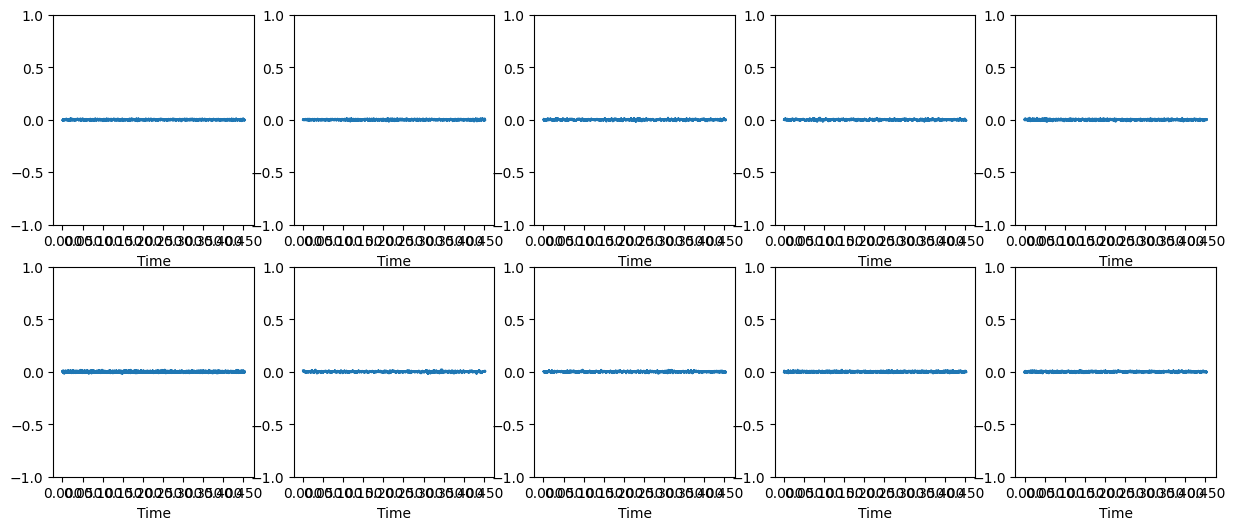

In [81]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_test_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

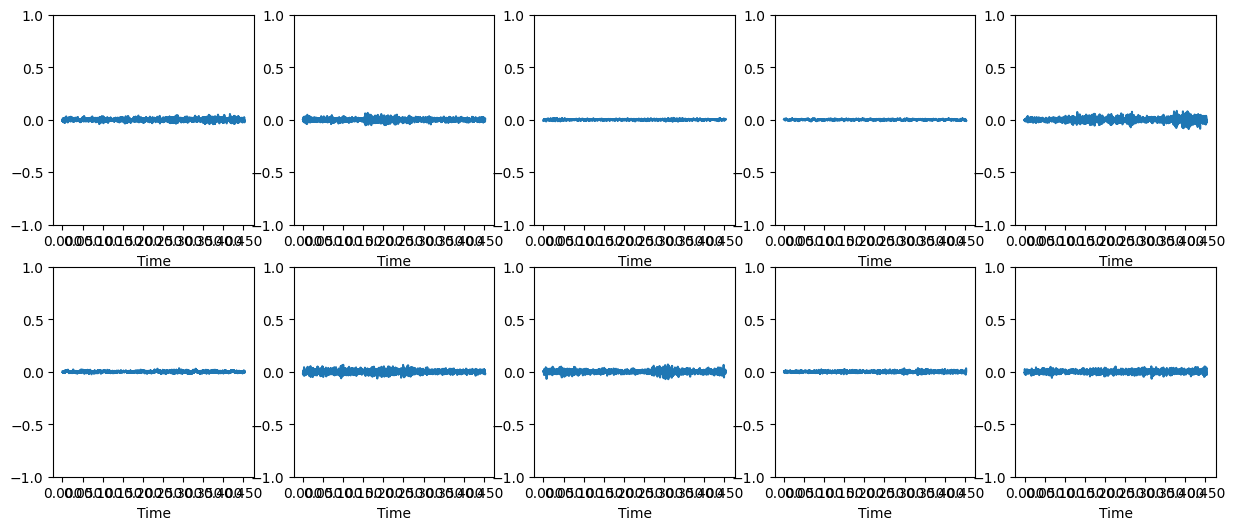

In [82]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_test_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [83]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [84]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [85]:
normal_test_features = np.array([extract_features(x) for x in normal_test_signals])
abnormal_test_features = np.array([extract_features(x) for x in abnormal_test_signals])

In [86]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [87]:
print(normal_test_features.shape)
print(abnormal_test_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(154, 2)
(54, 2)
(119, 2)
(47, 2)


In [88]:
print(normal_test_features[10])
print(abnormal_test_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[4.78515625e-02 2.15636752e+03]
[4.49218750e-02 1.64451301e+03]
[4.39453125e-02 1.65073992e+03]
[3.22265625e-02 1.49050221e+03]


Text(0, 0.5, 'Count')

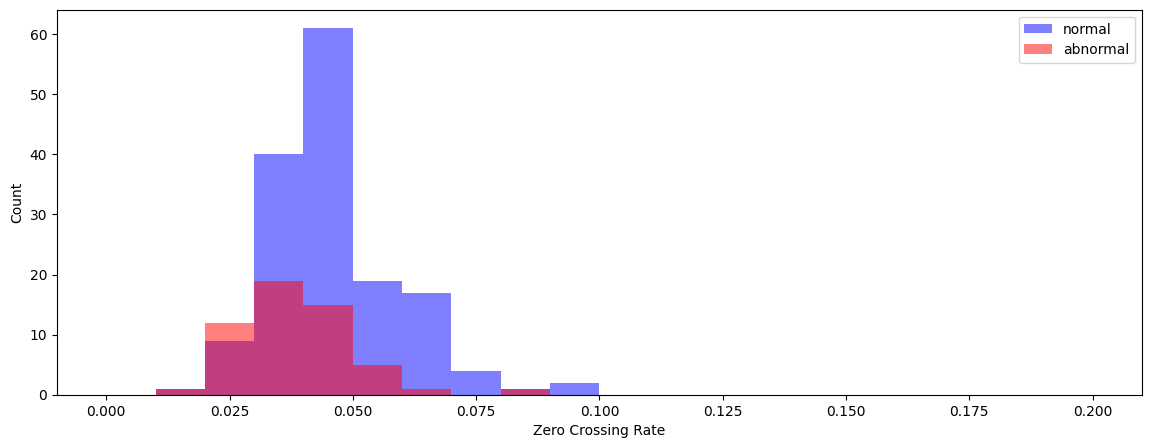

In [89]:
plt.figure(figsize=(14, 5))
plt.hist(normal_test_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_test_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

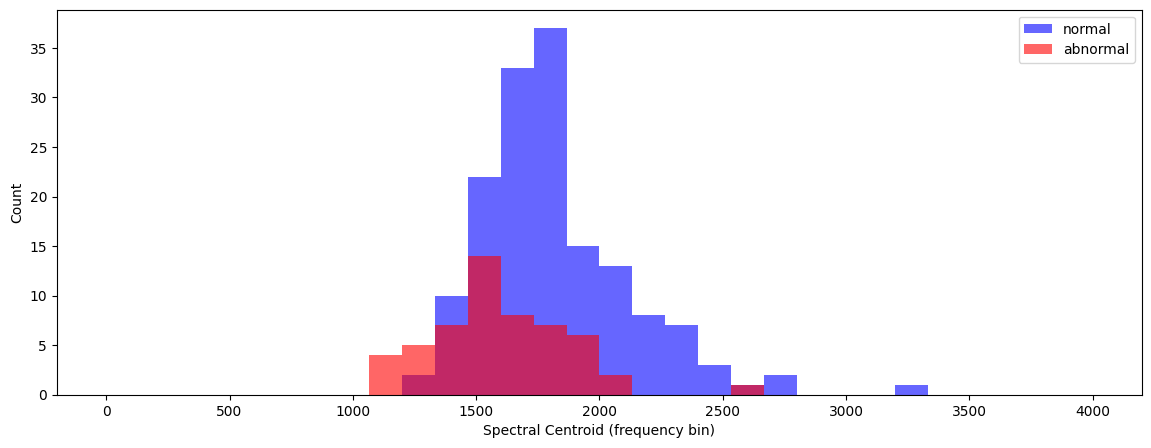

In [90]:
plt.figure(figsize=(14, 5))
plt.hist(normal_test_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_test_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [91]:
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
print(feature_test_table.shape)

(208, 2)


In [92]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [93]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
testing_features = scaler.fit_transform(feature_test_table)
print(testing_features.min(axis=0))
print(testing_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [94]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

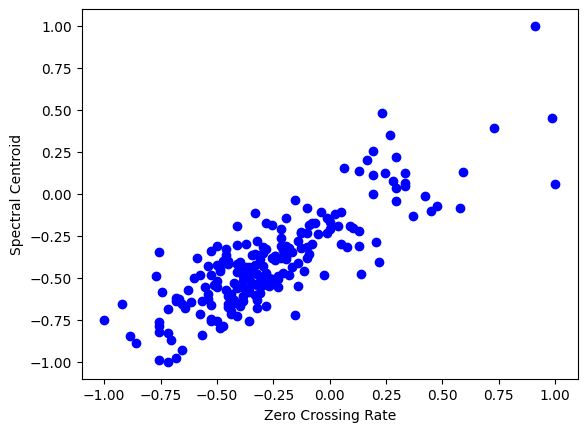

In [95]:
plt.scatter(testing_features[:489,0], testing_features[:489,1], c='b')
plt.scatter(testing_features[489:,0], testing_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [96]:
y_test_total = [0 for i in range(len(normal_test_signals))] + [1 for i in range(len(abnormal_test_signals))]
y_val_total = [0 for i in range(len(normal_val_signals))] + [1 for i in range(len(abnormal_val_signals))]

In [97]:
y_test_encoded = to_categorical(y_test_total)
y_val_encoded = to_categorical(y_val_total)

In [98]:
y_test_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [99]:
x_test = testing_features
y_test = y_test_encoded
x_val = val_features
y_val = y_val_encoded

In [100]:
x_test.shape, y_test.shape

((208, 2), (208, 2))

In [122]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [102]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [103]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [104]:
his = model.fit(
    x_test,
    y_test,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6947 - loss: 0.6482 - val_accuracy: 0.7169 - val_loss: 0.6544
Epoch 2/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6771 - loss: 0.6910 - val_accuracy: 0.7169 - val_loss: 0.6532
Epoch 3/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7011 - loss: 0.6366 - val_accuracy: 0.7169 - val_loss: 0.6520
Epoch 4/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6389 - loss: 0.7191 - val_accuracy: 0.7169 - val_loss: 0.6510
Epoch 5/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6713 - loss: 0.6717 - val_accuracy: 0.7169 - val_loss: 0.6498
Epoch 6/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7221 - loss: 0.6505 - val_accuracy: 0.7169 - val_loss: 0.6486
Epoch 7/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7412 - loss: 0.6468 - val_accuracy: 0.7169 - val_loss: 0.6478
Epoch 8/100
208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6908 - loss: 0.6510 - val_accu

In [105]:
import plotly
import plotly.graph_objs as go

In [106]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [107]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [108]:
file_name = '/content/drive/MyDrive/Dst/test/a_00000001_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


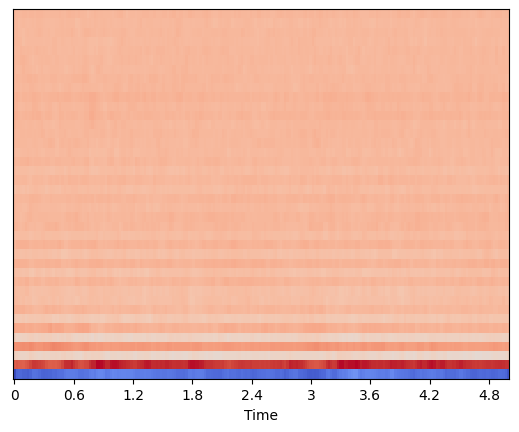

In [109]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [110]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [111]:
normal_test_features = []
for file_name in glob.glob(normal_test):
    data = extract_features(file_name)
    normal_test_features.append(data)

abnormal_test_features = []
for file_name in glob.glob(abnormal_test):
    data = extract_features(file_name)
    abnormal_test_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [112]:
normal_test_features[0].shape

(40, 216)

In [113]:
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
print(feature_test_table.shape)

(208, 40, 216)


In [114]:
y_test_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [115]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [116]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [132]:
x_test = feature_test_table.reshape(feature_test_table.shape[0], feature_test_table.shape[1], feature_test_table.shape[2], 1)
x_val = feature_val_table
y_test = y_test_encoded
y_val = y_val_encoded

In [118]:
x_test.shape, x_val.shape, y_test.shape, y_val.shape

((208, 40, 216), (166, 40, 216, 1), (208, 2), (166, 2))

In [119]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [138]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, activation='relu', input_shape=(num_rows, num_columns, num_channels)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [124]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [125]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [126]:
his = model.fit(x_test, y_test, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.4294 - loss: 18.5072
Epoch 1: val_loss improved from inf to 7.46315, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 516ms/step - accuracy: 0.4522 - loss: 17.3881 - val_accuracy: 0.7169 - val_loss: 7.4632
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.7209 - loss: 11.2912
Epoch 2: val_loss improved from 7.46315 to 3.53390, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - accuracy: 0.7248 - loss: 11.0187 - val_accuracy: 0.7169 - val_loss: 3.5339
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.6977 - loss: 3.4643
Epoch 3: val_loss improved from 3.53390 to 0.53062, saving model to best_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step - accuracy: 0.6851 - loss: 3.3744 - val_accuracy: 0.8012 - val_loss: 0.5306
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - accuracy: 0.4185 - loss: 2.9674
Epoch 4: val_loss did not improve from 0.53062
4/4 ━━━━━━━━━━━━━

In [127]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [128]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [140]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [141]:
test_res = model.evaluate(x_test, y_test, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in test_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Testing  - loss: {test_res['loss']:.4f}, acc: {test_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")

Testing  - loss: 0.1909, acc: 0.9231
Validation- loss: 0.3224, acc: 0.8855


In [142]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


In [143]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119   0]
 [ 19  28]]


In [144]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.8623    1.0000    0.9261       119
    abnormal     1.0000    0.5957    0.7467        47

    accuracy                         0.8855       166
   macro avg     0.9312    0.7979    0.8364       166
weighted avg     0.9013    0.8855    0.8753       166



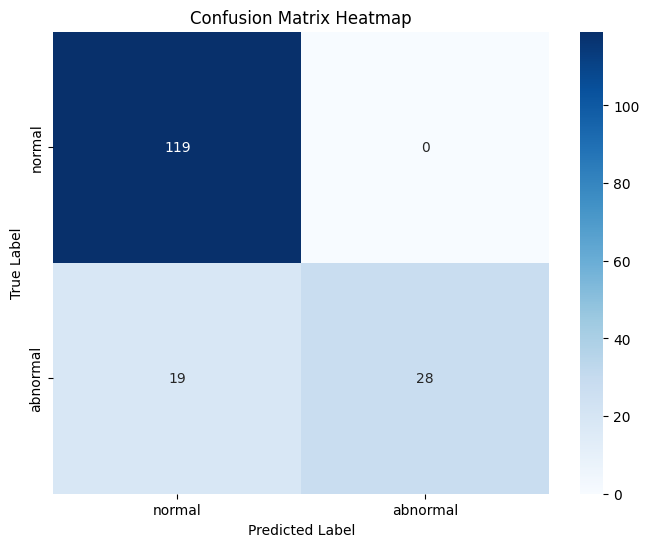

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()